# Real Time quality control data

Real-Time quality control is a set of automatic procedures that are performed in the National Data Acquisition Centers (DACs) to carry out the first quality control of the data. 
There are a total of 19 tests that aim, to say, easy to identify anomalies in the data, because the subtle anomalies, that need a lot of expertise, and time, to discern between sensor malfunctioning and natural variability are left for the deleted mode quality control. 

The results of the real-time tests are summarized in what is called the **quality control flags**. Quality control flags are an essential part of Argo.

## Quality Control flags

Each observation after the RT quality control has a QC flag associated, a number from 0 to 9, with the following meaning:

|QCflag|Meaning|Real time description|
|:----:|:-----:|:-------------------:|
|0 |No QC performed|No QC performed|
|1 |Good data|All real time QC tests passed|
|2 |Probably good data|	Probably good|
|3 |Bad data that are potentially correctable|Test 15 or Test 16 or Test 17 failed and all other real-time QC tests passed. These  data are not to be used without scientific correction. A flag ‘3’ may be assigned by an operator during additional visual QC for bad |data that may be corrected in delayed mode.|
|4 |Bad data|Data have failed one or more of the real-time QC tests, excluding Test 16. A flag ‘4’ may be assigned by an operator during additional visual QC for bad data that are not correctable.|
|5 |Value changed|Value changed|
|6 |Not currently used |Not currently used|
|7 |Not currently used |Not currently used|
|8 |Estimated |Estimated value (interpolated, extrapolated or other estimation)|
|9 |Missing value|Missing value|

Let's see how this information is stored in the NetCDF files

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

Before accesing the data, let's create some usefull colormaps and colorbar makers to help us to understand the QC flags

In [2]:
qcmap = mpl.colors.ListedColormap(['#000000', 
                                   '#31FC03', 
                                   '#ADFC03', 
                                   '#FCBA03', 
                                   '#FC1C03',
                                   '#324CA8', 
                                   '#000000', 
                                   '#000000', 
                                   '#B22CC9', 
                                   '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

open the daily data set from the 11th november 2019

In [3]:
dayADS = xr.open_dataset('./Data/atlantic_ocean/2019/11/20191111_prof.nc')

In [4]:
dayADS

<xarray.Dataset>
Dimensions:                       (N_PROF: 184, N_PARAM: 3, N_LEVELS: 1277, N_CALIB: 3, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-07-11T03:31:23Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

Beside the core variables, TEMP, PSAL and PRES, we also have the variables TEMP_ADJUSTED, PSAL_ADJUSTED and PRES_ADJUSTED, that correspond to DM, or calibrated data. However, here we keep the focus in the Real Time data, and in the next section we will use the calibrated data.

Let's begin by plotting all the data. We will use a [TS diagram](http://www.physocean.icm.csic.es/ShelfCoast/chapter10-en.html)

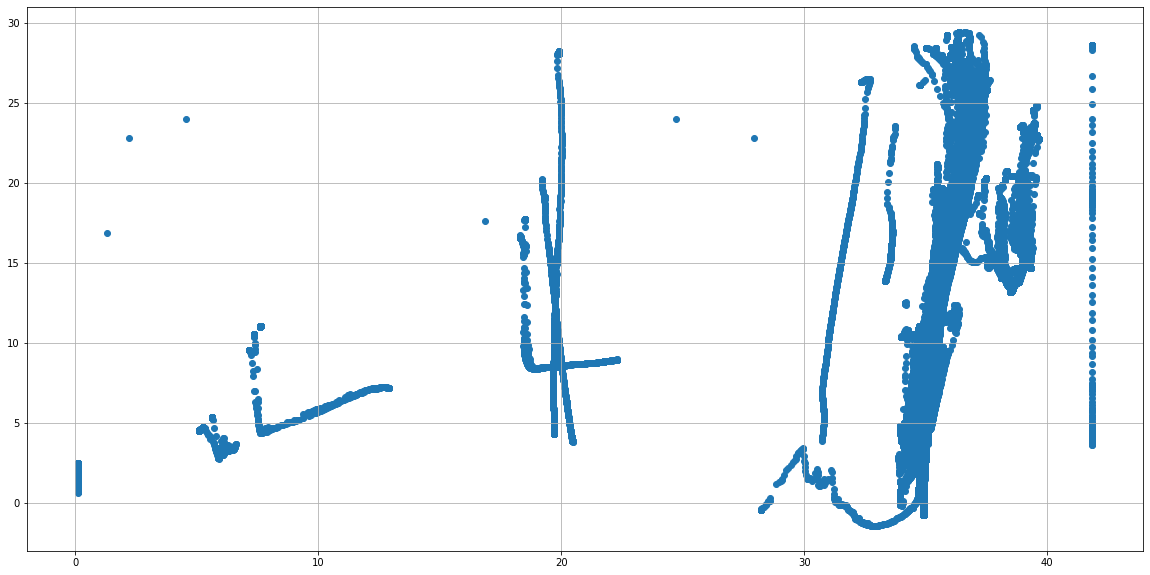

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL, dayADS.TEMP, cmap=qcmap)
ax.grid()

In [5]:
pres=dayADS.PRES
lon=dayADS.LONGITUDE+pres*0
lon

<xarray.DataArray (N_PROF: 184, N_LEVELS: 1277)>
array([[-80.12899   , -80.12899   , -80.12899   , ...,          nan,
                 nan,          nan],
       [-79.152     , -79.152     , -79.152     , ...,          nan,
                 nan,          nan],
       [-22.5808    , -22.5808    , -22.5808    , ...,          nan,
                 nan,          nan],
       ...,
       [ 10.82094333,  10.82094333,  10.82094333, ...,          nan,
                 nan,          nan],
       [ 31.09137667,  31.09137667,  31.09137667, ...,          nan,
                 nan,          nan],
       [-65.20724   , -65.20724   , -65.20724   , ...,          nan,
                 nan,          nan]])
Dimensions without coordinates: N_PROF, N_LEVELS

In [6]:
cycle=dayADS.CYCLE_NUMBER+pres*0

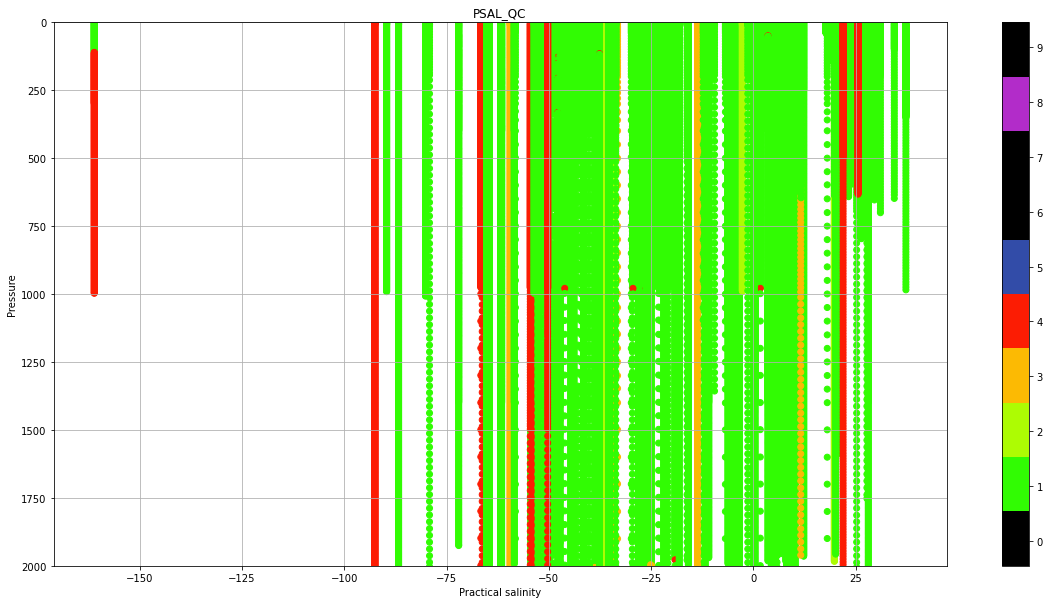

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(lon, pres, c=dayADS.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title('PSAL_QC');

In [8]:
l=dayADS.PSAL_QC[0,0]
print(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 1))

<xarray.DataArray 'PSAL' (N_PROF: 184, N_LEVELS: 1277)>
array([[35.878, 35.878, 35.878, ...,    nan,    nan,    nan],
       [   nan,    nan, 36.374, ...,    nan,    nan,    nan],
       [35.705, 35.705, 35.706, ...,    nan,    nan,    nan],
       ...,
       [38.139, 38.137, 38.137, ...,    nan,    nan,    nan],
       [18.546, 18.548, 18.553, ...,    nan,    nan,    nan],
       [36.583, 36.585, 36.586, ...,    nan,    nan,    nan]],
      dtype=float32)
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001


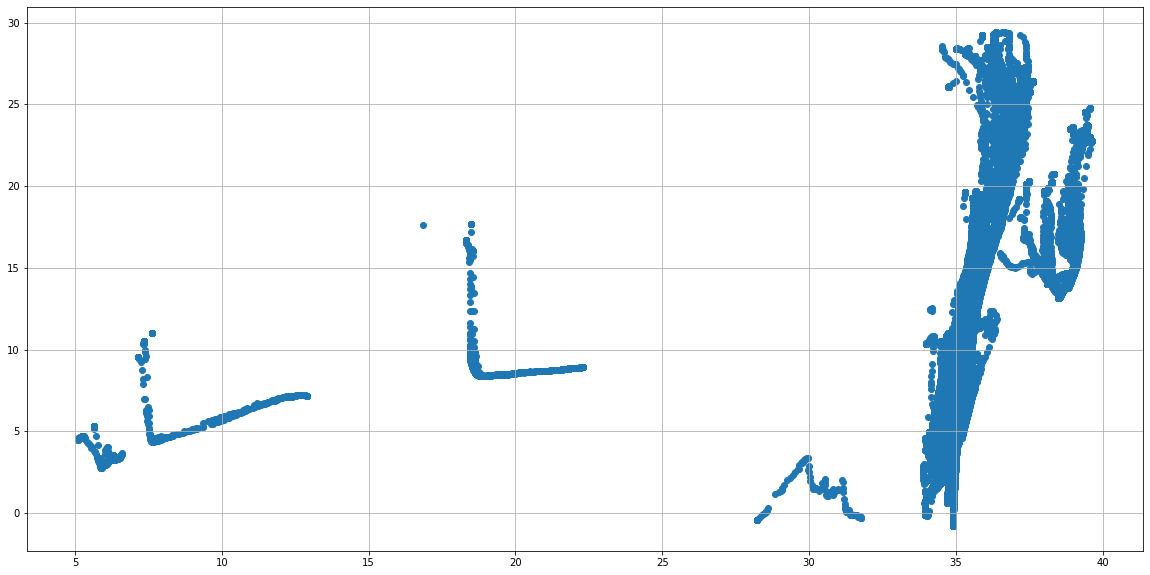

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 1), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 1))
ax.grid()